In [2]:
import sys
sys.path.append('..')
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.annotation.watershed import Watershed, init_watershed
from hydra import initialize, compose

In [3]:
def show_image(im: np.array) -> None:
    plt.imshow(im, cmap='gray')
    plt.axis('off')

In [4]:
watershed = init_watershed(
    config_path='../../configs/watershed',
    config_name='watershed'
)

In [5]:
img = cv2.imread('../data/covdor/192.168.1.11_2024-12-07T18:00:08.png')

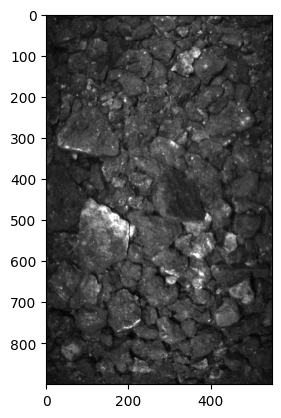

In [6]:
plt.imshow(img)

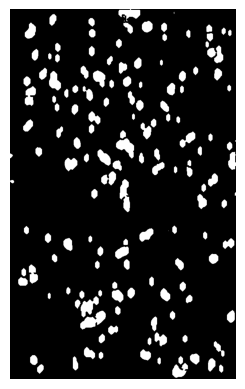

In [7]:
result = watershed.apply_watershed(img)
show_image(result)

In [8]:
def override_watershed(config_path='../configs/watershed', config_name='watershed', overrides=None):
    with initialize(version_base=None, config_path=config_path):
        overrides = overrides or []
        cfg = compose(config_name=config_name, overrides=overrides)
        wshed = Watershed(cfg)
    return wshed

In [9]:
# Function to test one parameter at a time and plot the results
def test_parameter(image, param_name, param_values, fixed_params,
                   config_path='../configs/watershed', config_name='watershed'):
    fig, axes = plt.subplots(1, len(param_values)+1, figsize=(25, 10))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('image')
    axes[0].axis('off')

    for idx, value in enumerate(param_values):
        # Create the override for the single parameter to be tested
        overrides = [f"{param_name}={value}"]
        
        # Add fixed parameters to the overrides
        for key, fixed_value in fixed_params.items():
            if key != param_name:
                overrides.append(f"{key}={fixed_value}")

        # Instantiate watershed with the current override parameters
        watershed = override_watershed(config_path=config_path, config_name=config_name, overrides=overrides)
        
        # Apply watershed to the image
        processed_image = watershed.apply_watershed(image)

        # Plot the result
        ax = axes[idx+1]
        ax.imshow(processed_image, cmap='gray')
        ax.set_title(f"{param_name}: {value}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
fixed_params = {
    'preprocess.single_scale_retinex.sigma': 50,
    'preprocess.bilateral_filtering.diameter': 9,
    'preprocess.bilateral_filtering.sigma_color': 75,
    'preprocess.bilateral_filtering.sigma_space': 75,
    'preprocess.morphological_transform.kernel_size': [5, 5],
    'preprocess.gaussian_blur.kernel_size': [7, 7],
    'preprocess.gaussian_blur.sigma_x': 2,
    'preprocess.minmax.span': [0, 255]
}
param_grid = {
    'preprocess.single_scale_retinex.sigma': [15, 50, 80, 100, 150],
    'preprocess.bilateral_filtering.diameter': [1, 3, 5, 7, 9],
    'preprocess.bilateral_filtering.sigma_color': [25, 50, 75, 100],
    'preprocess.bilateral_filtering.sigma_space': [25, 50, 75, 100],
    'preprocess.morphological_transform.kernel_size': [[3, 3], [5, 5]],
    'preprocess.gaussian_blur.kernel_size': [[3, 3], [5, 5]],
    'preprocess.gaussian_blur.sigma_x': [0, 1, 2],
}
param_grid_items = list(param_grid.items())
len(param_grid_items)

7

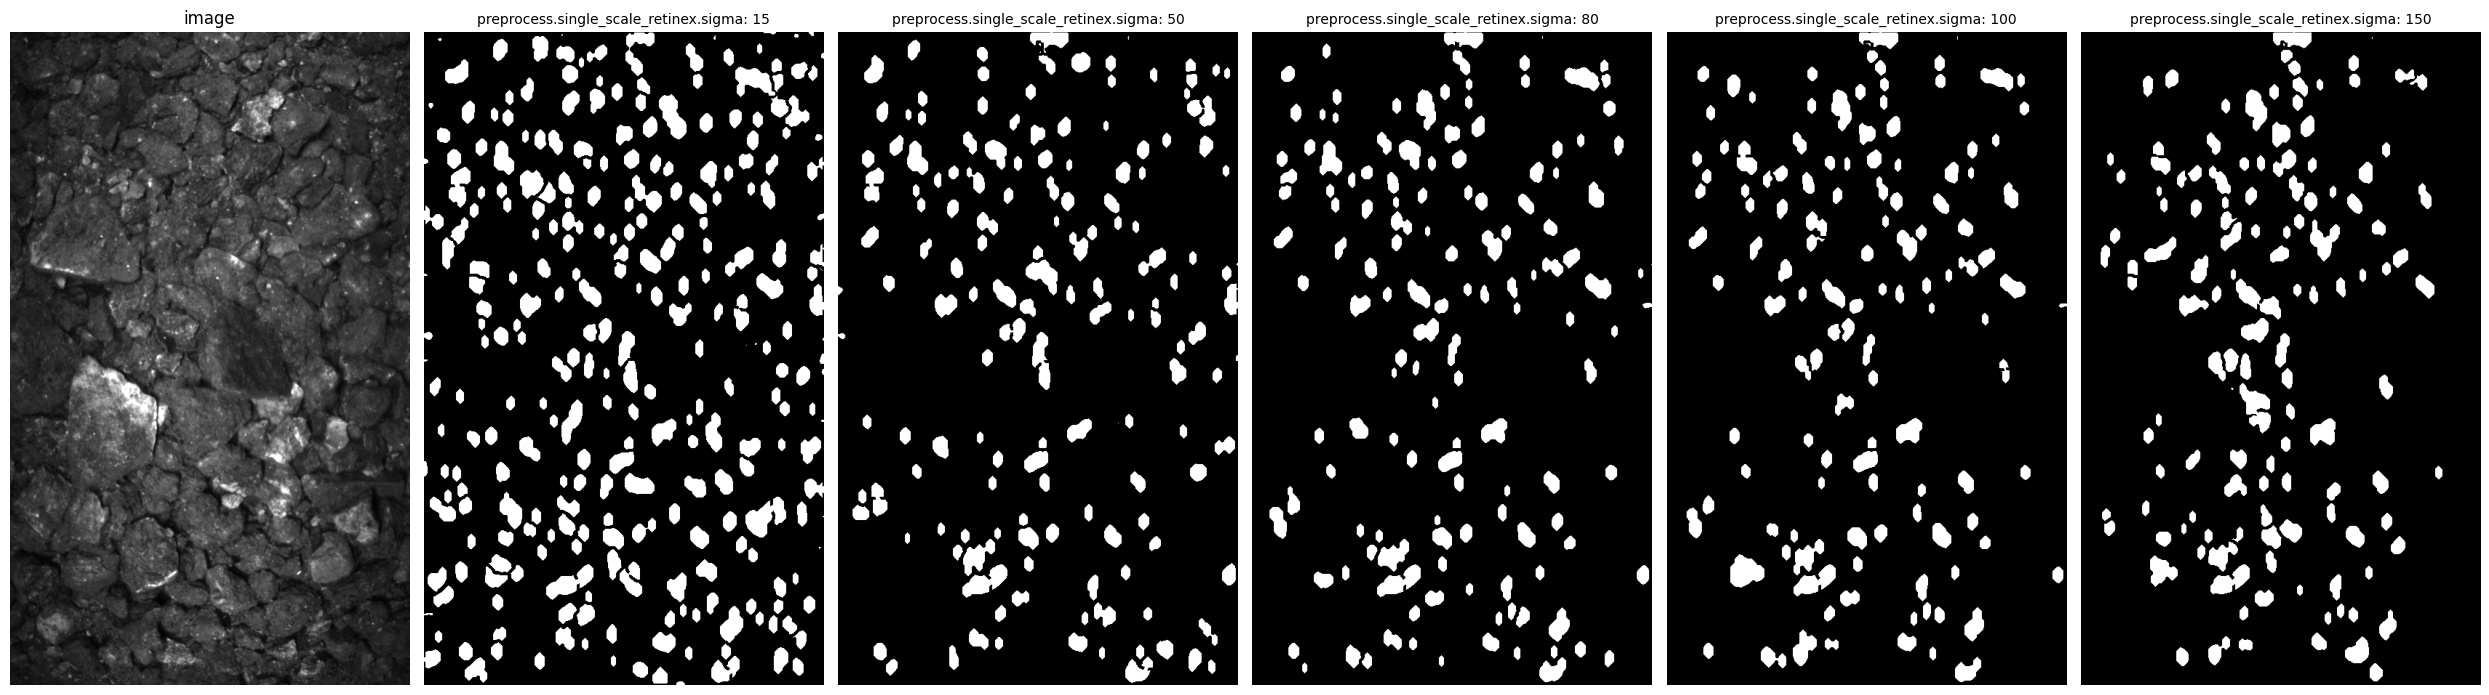

In [11]:
param_name, param_values = param_grid_items[0]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

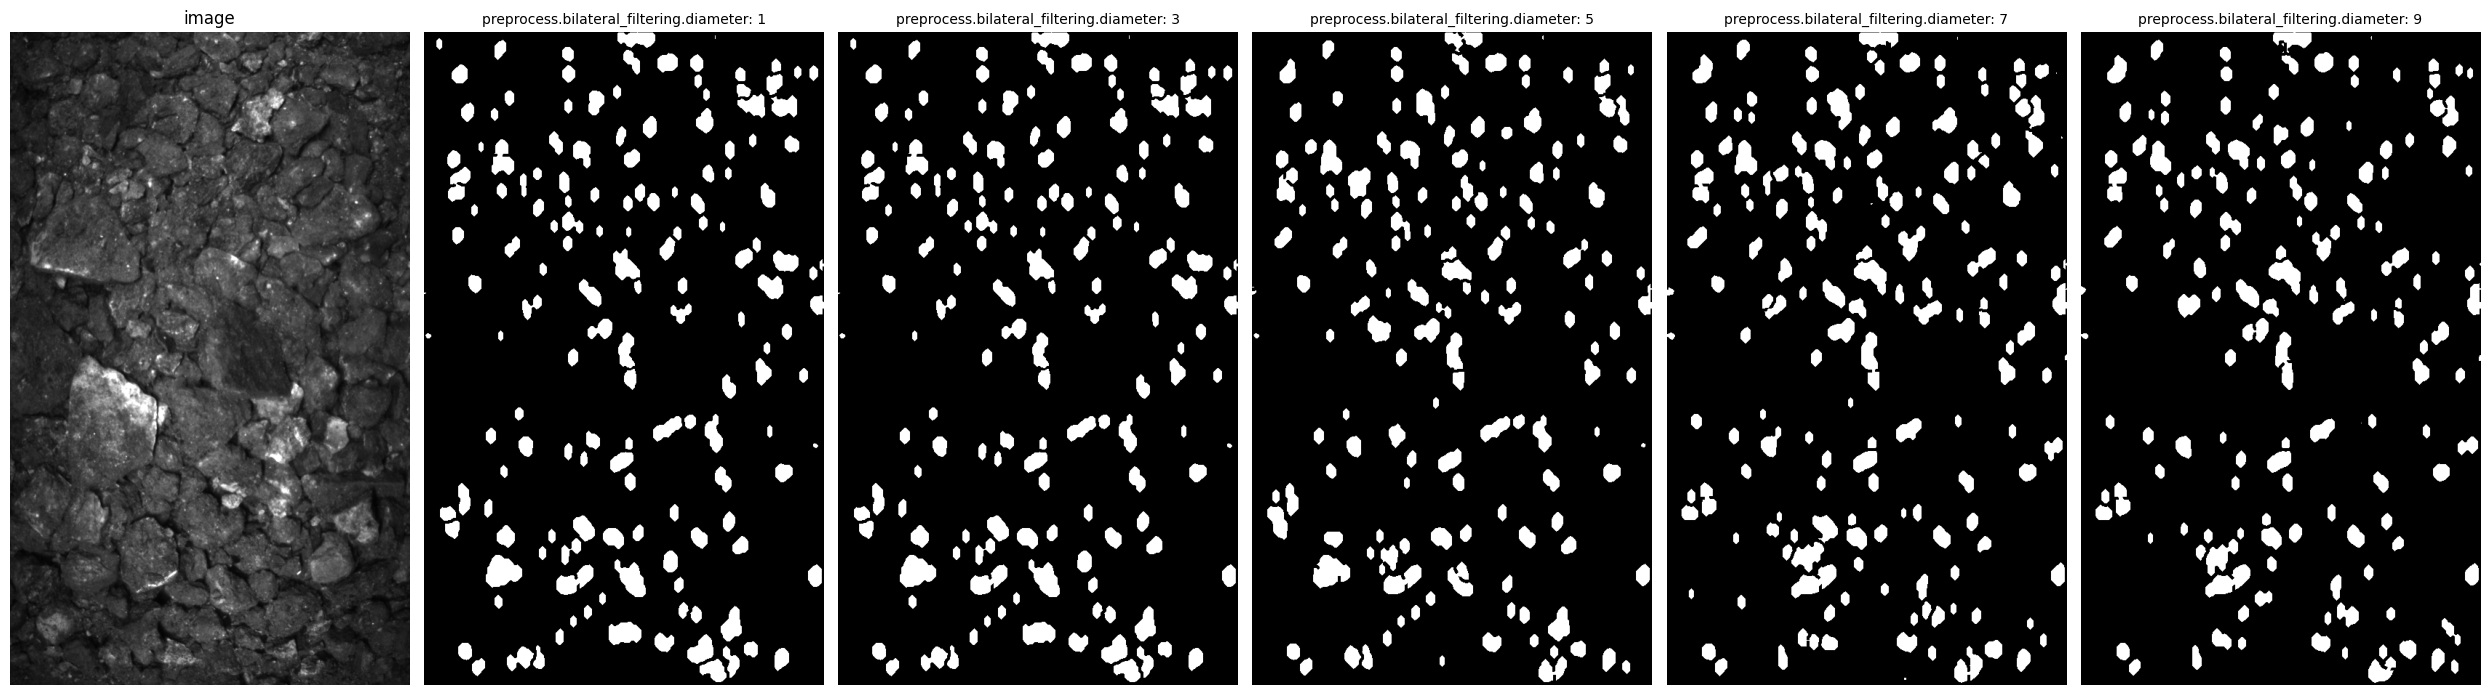

In [12]:
param_name, param_values = param_grid_items[1]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

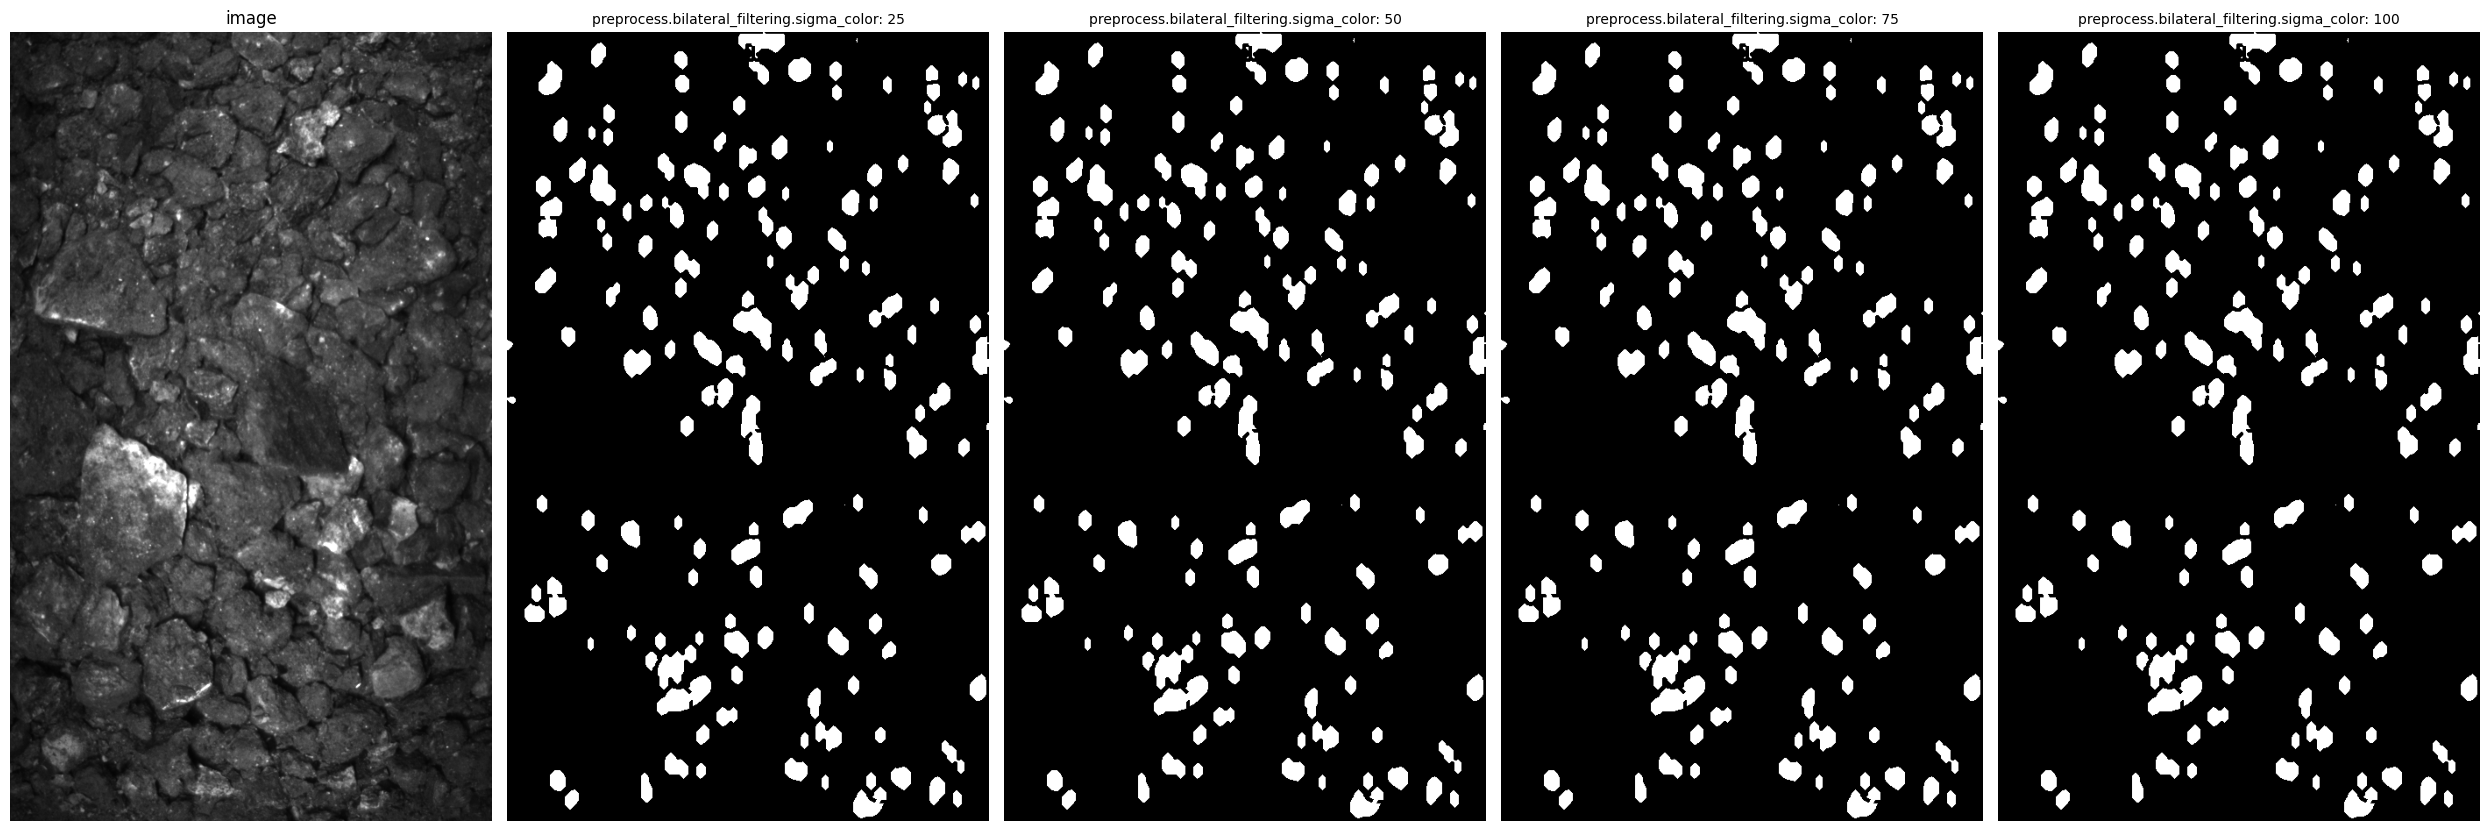

In [13]:
param_name, param_values = param_grid_items[2]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

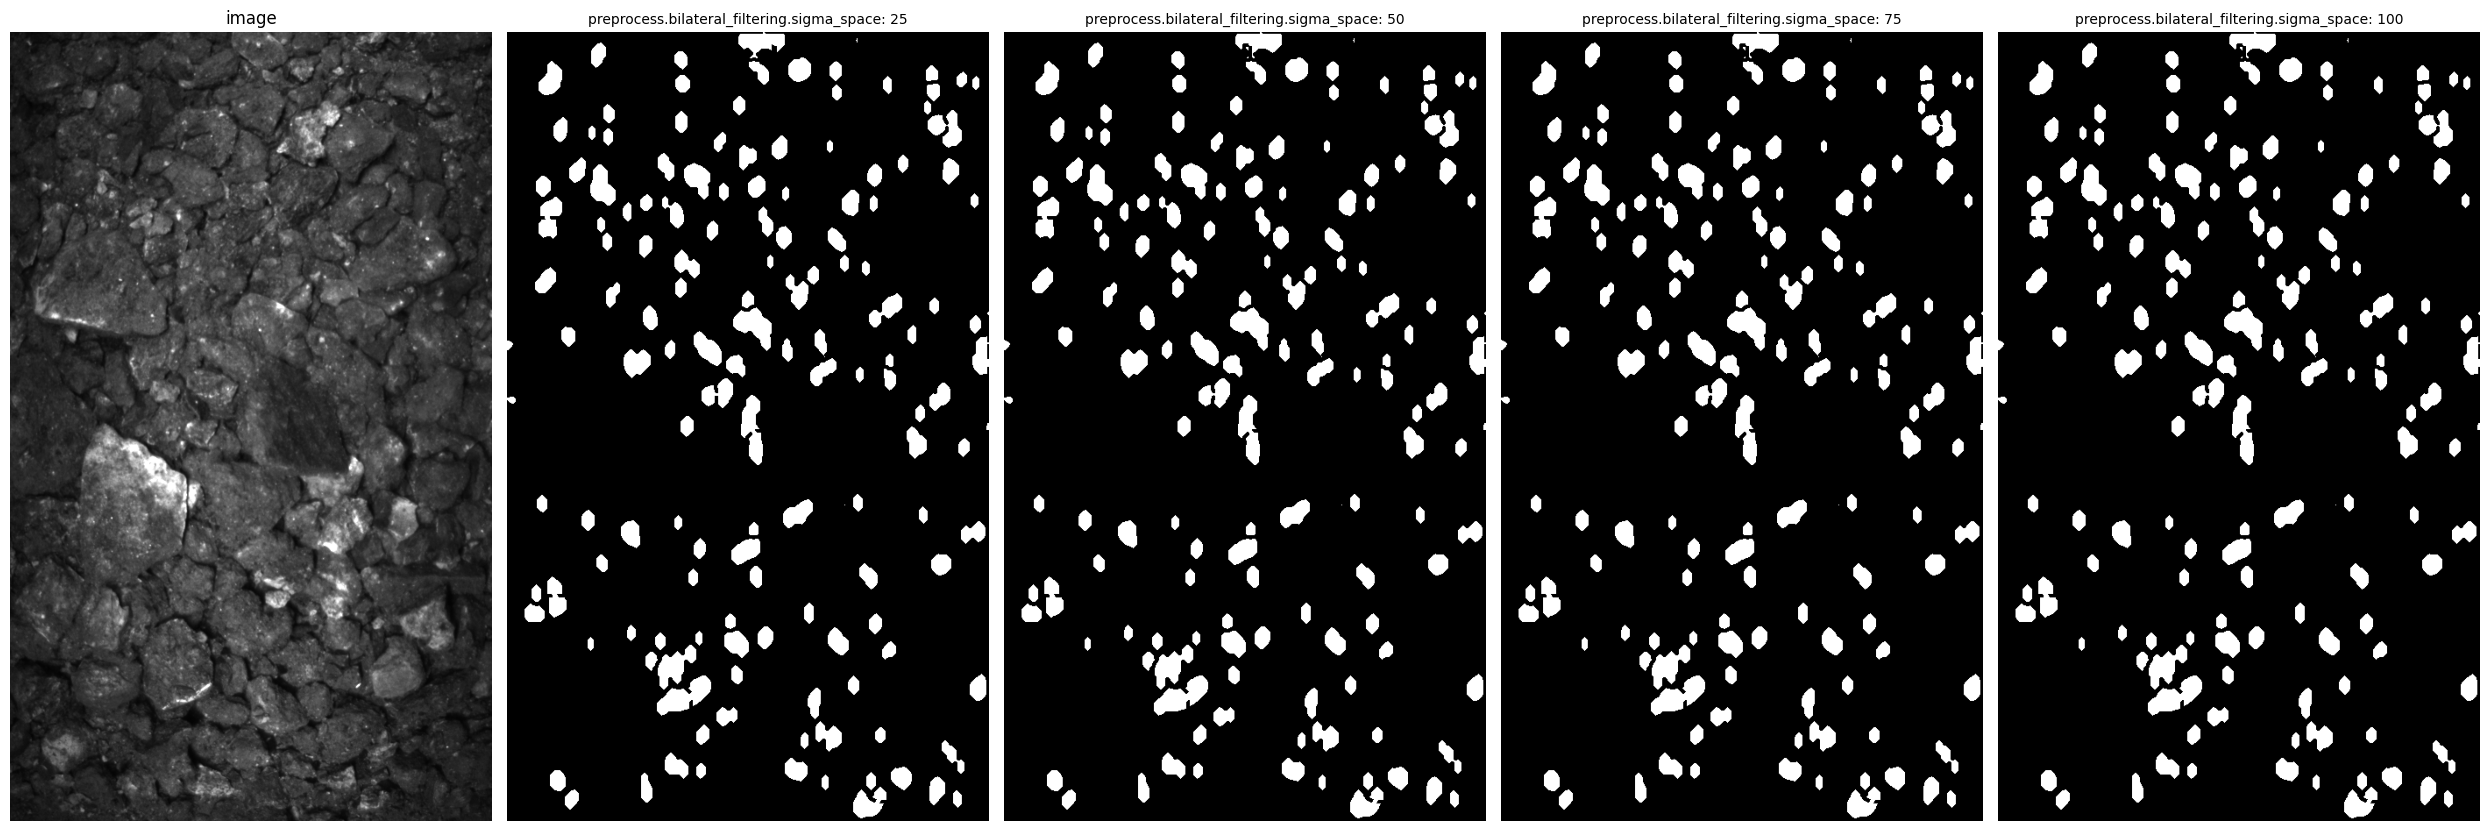

In [14]:
param_name, param_values = param_grid_items[3]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

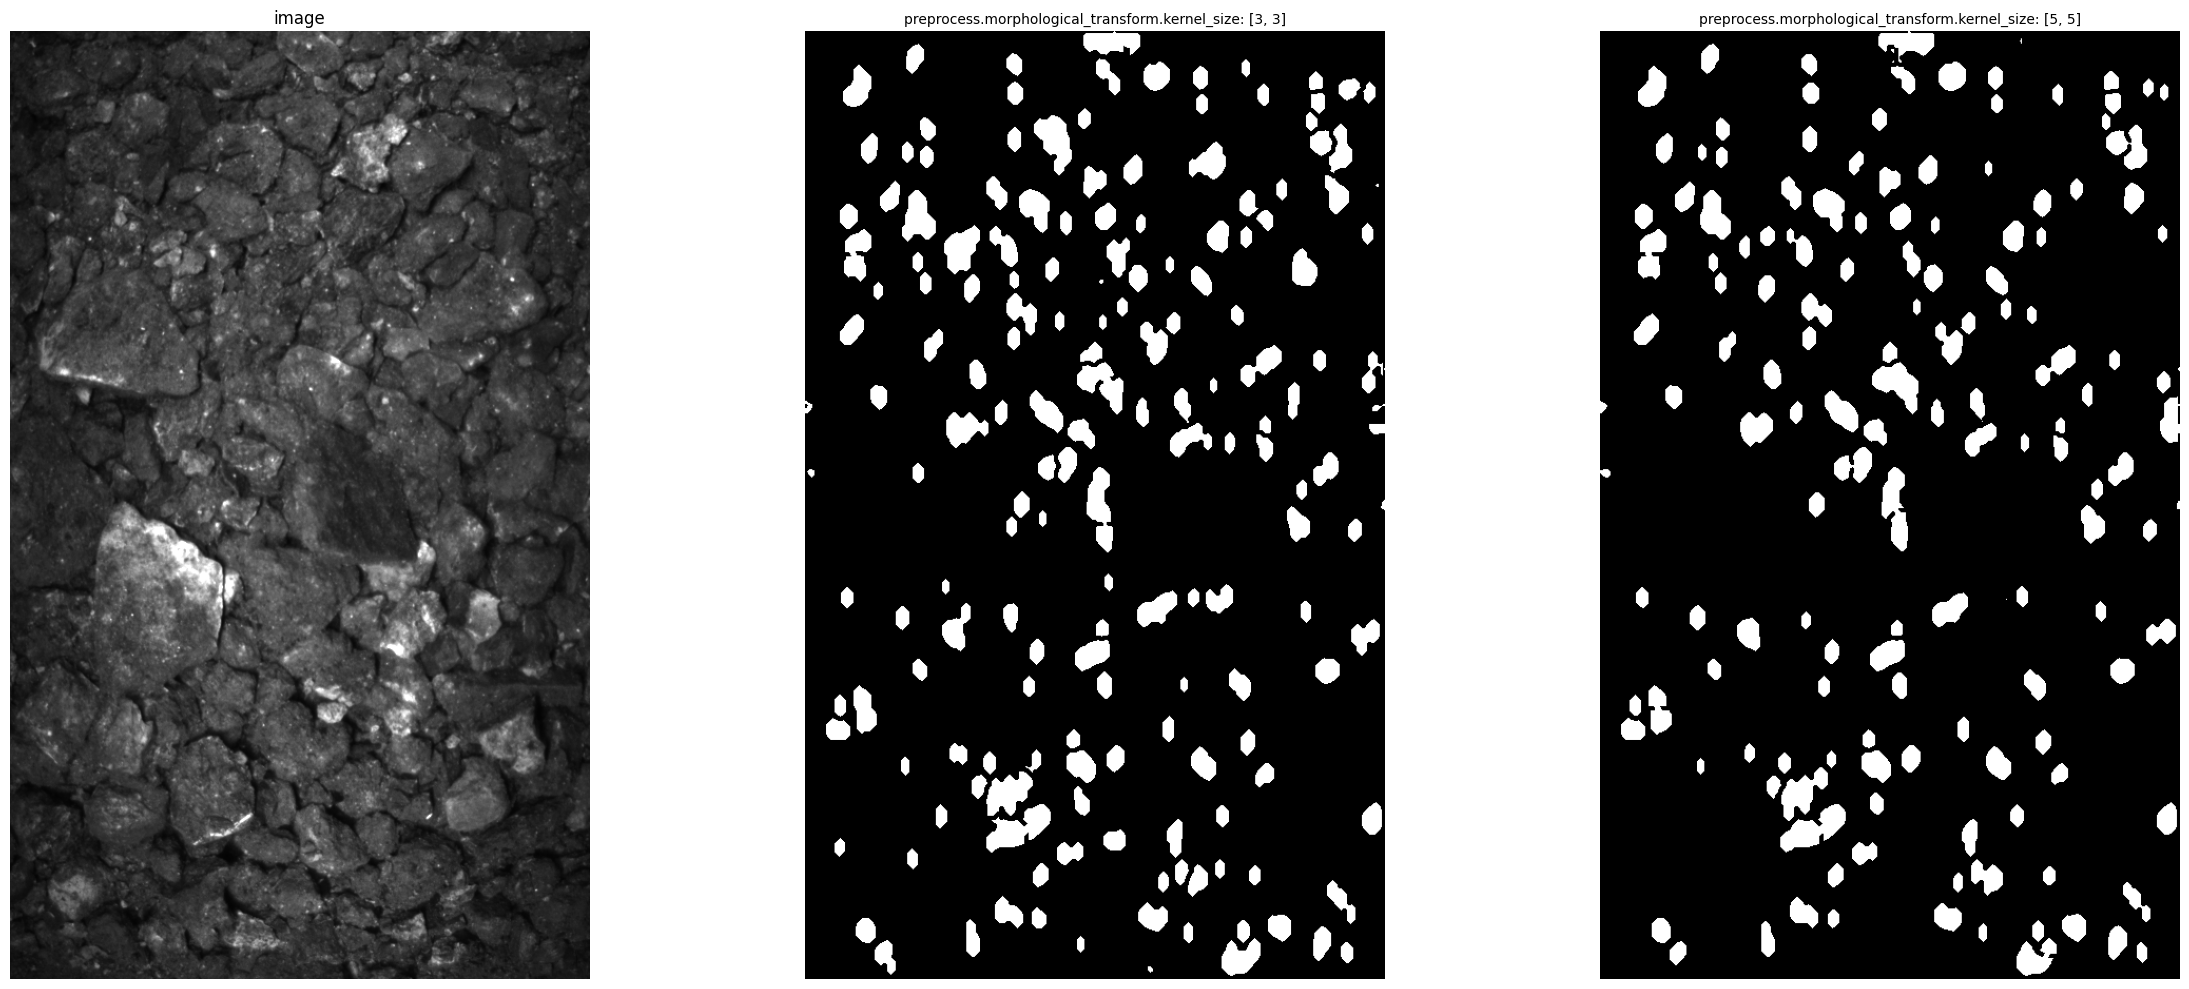

In [15]:
param_name, param_values = param_grid_items[4]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

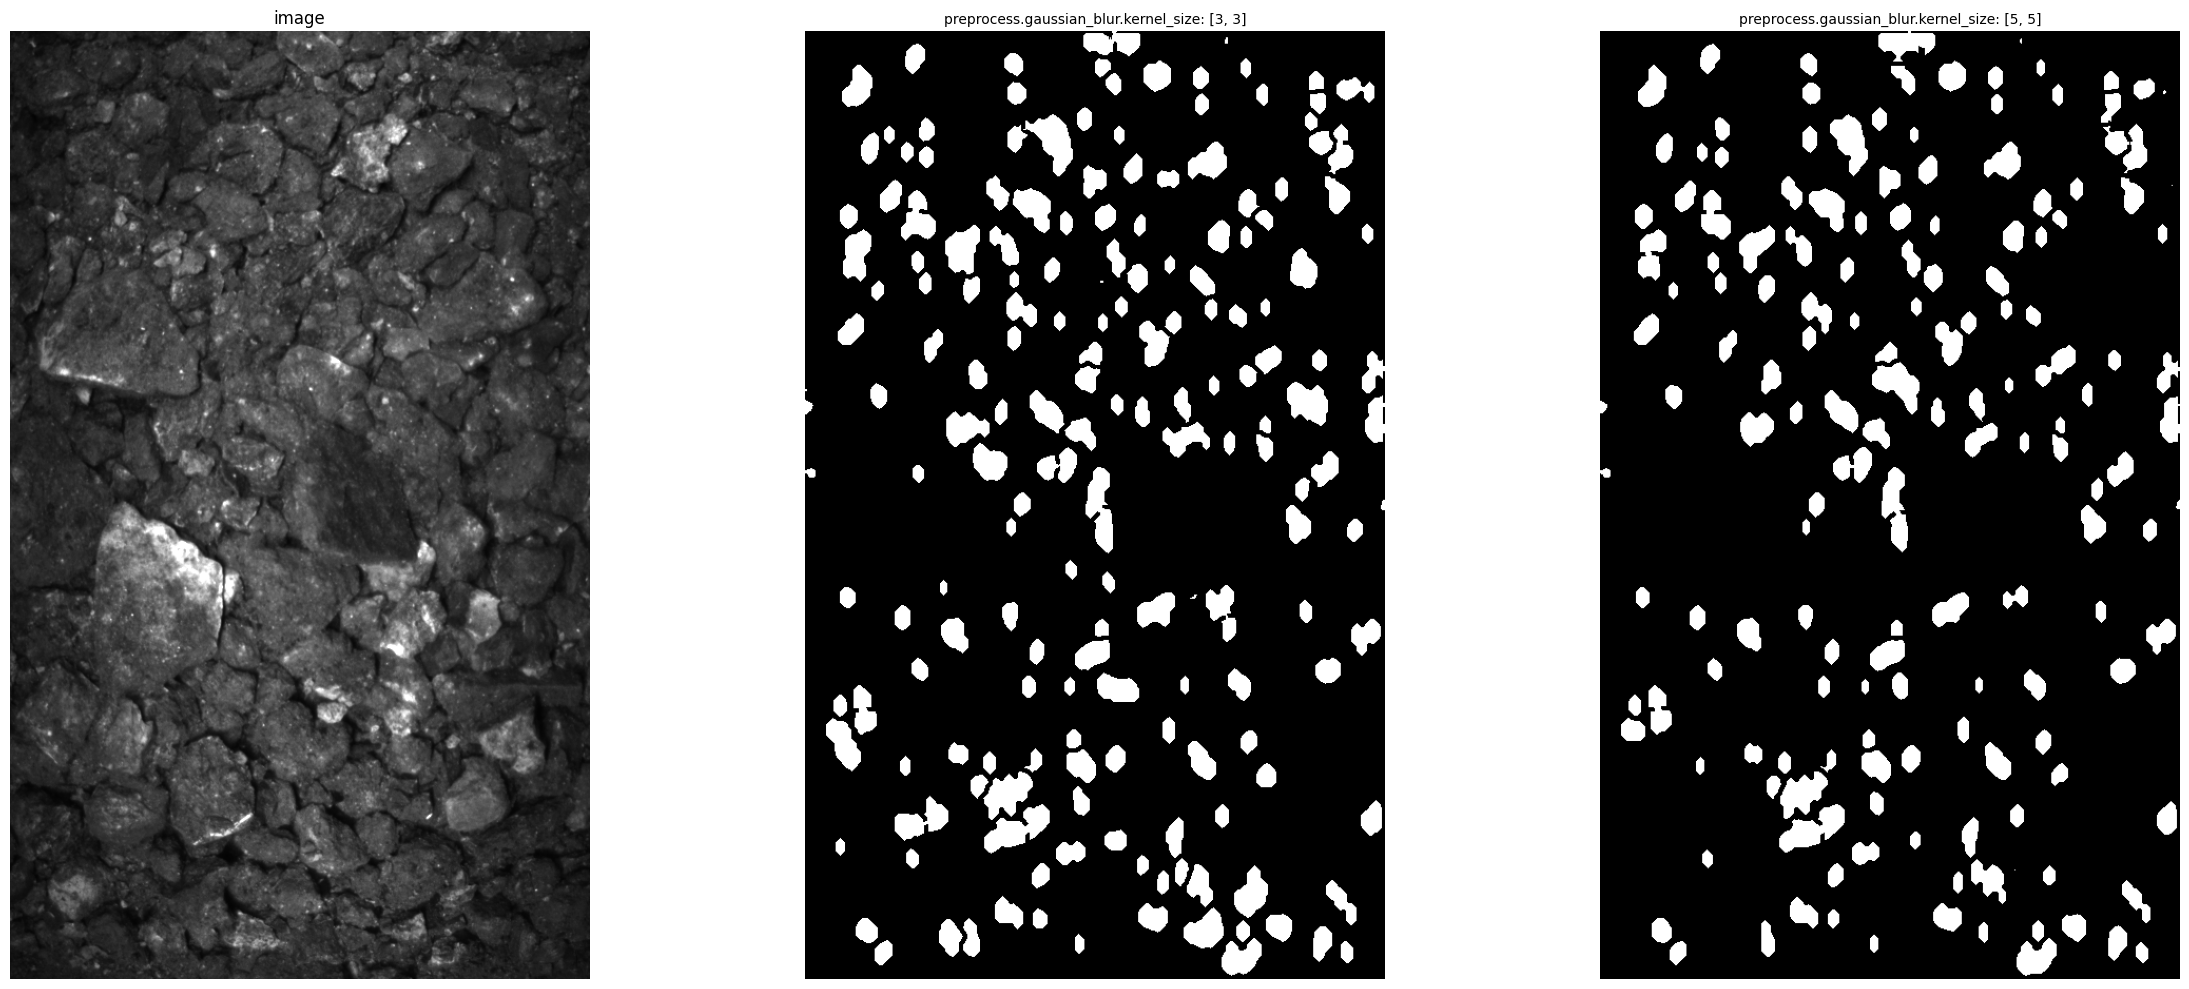

In [16]:
param_name, param_values = param_grid_items[5]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)

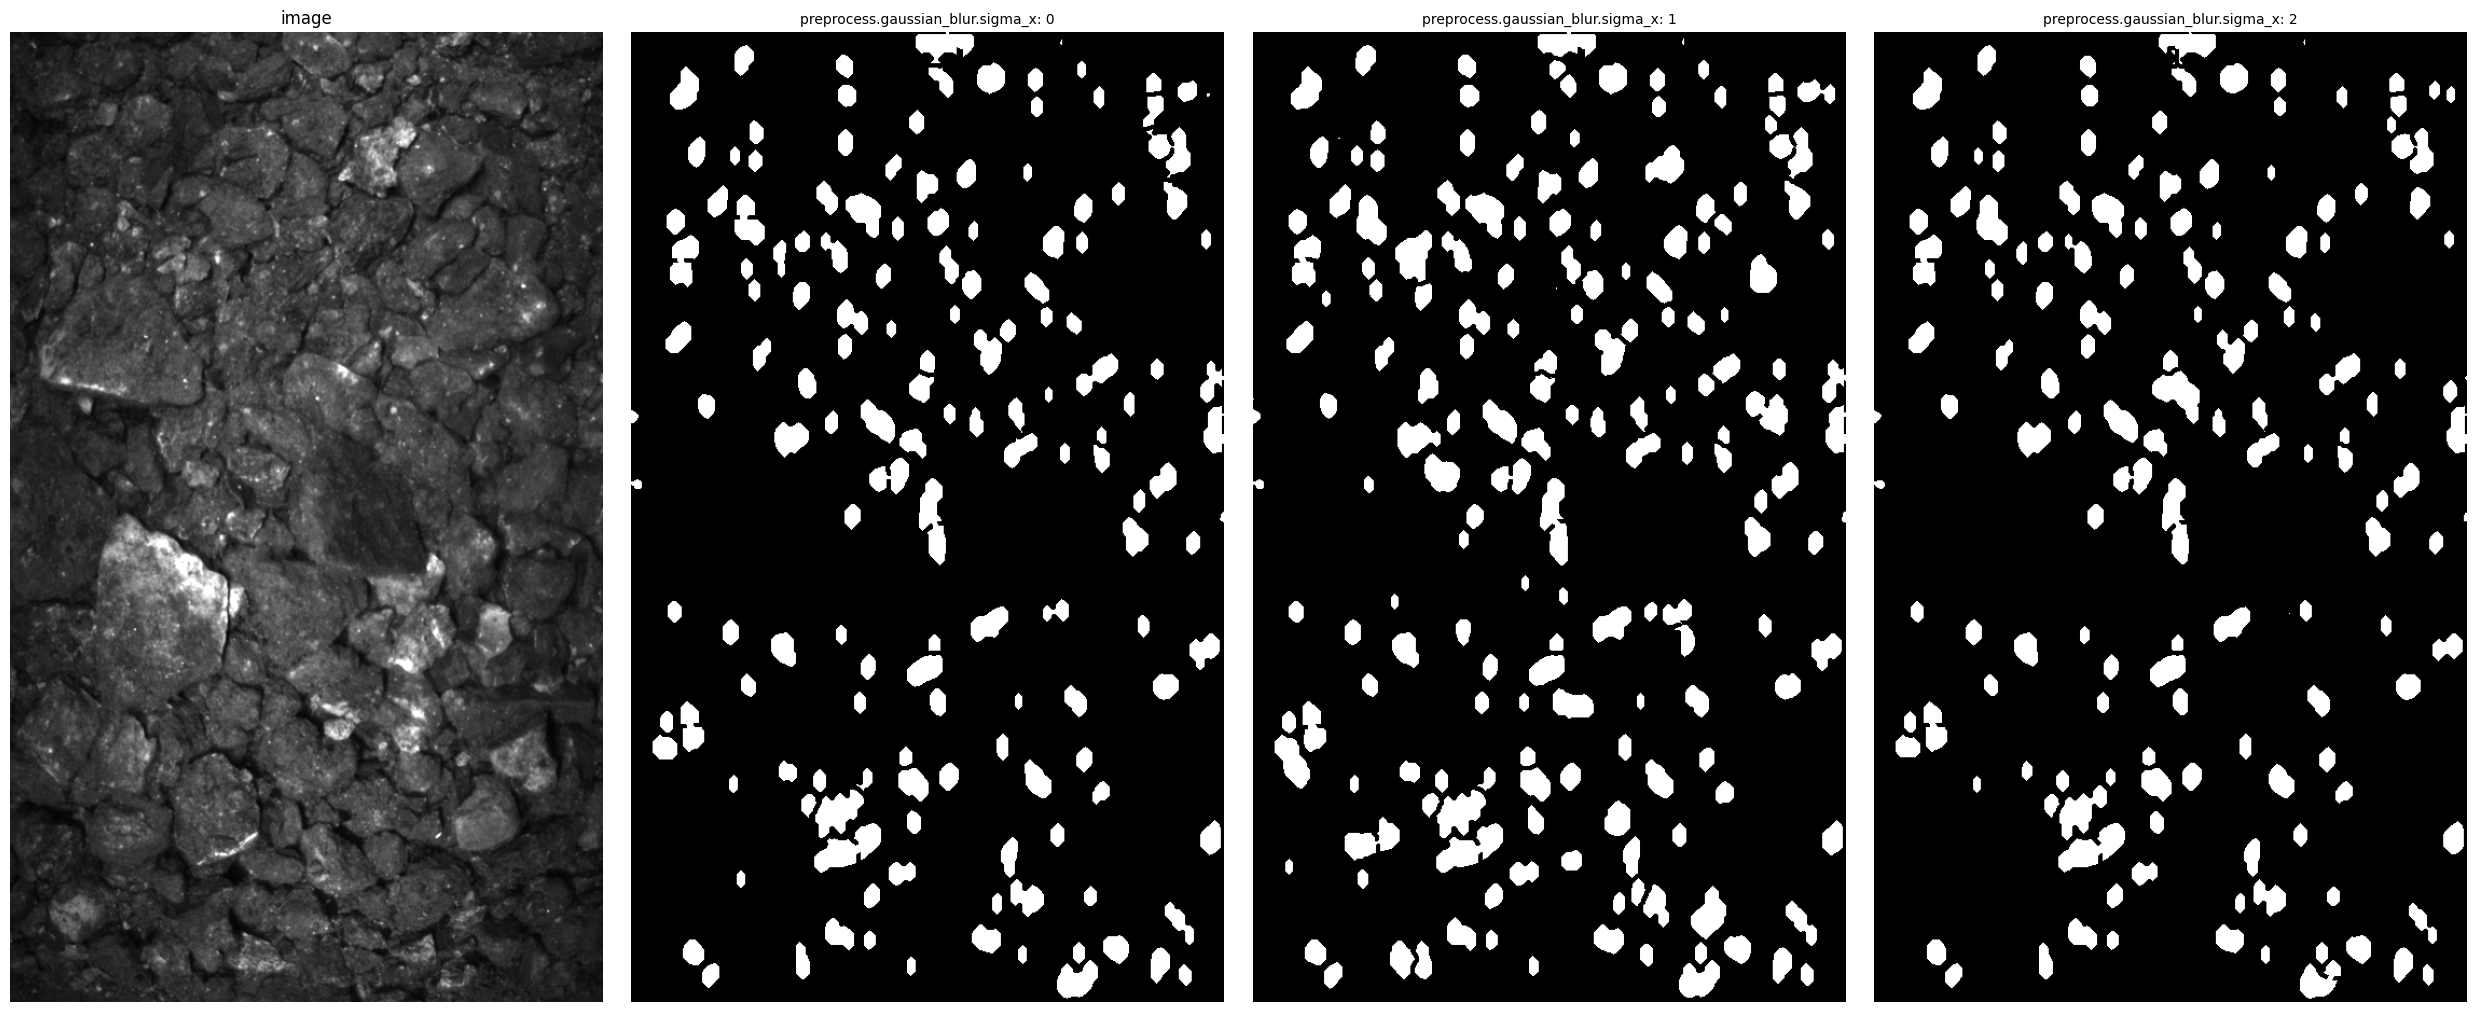

In [17]:
param_name, param_values = param_grid_items[6]

# Run the test and plot results
test_parameter(img, param_name=param_name, param_values=param_values, fixed_params=fixed_params)